# 统计长度分布，ASCII占比，标点符号占比等的分布

In [1]:
from collections import defaultdict

In [2]:
length_dict = defaultdict(int)
ascii_rate_dict = defaultdict(int)
pause_rate_dict = defaultdict(int)

In [3]:
with open('high_ff_final2_random.txt','r') as f_in:
    for line in f_in:
        str_len = len(line)
        ascii_count = sum(1 for c in line if ord(c) < 128)
        pause_count = sum(1 for c in line if c=='，' or c=='。')
        length_dict[str_len] += 1
        ascii_rate_dict[str(ascii_count/str_len)[:5]] += str_len
        pause_rate_dict[str(pause_count/str_len)[:5]] += str_len

In [29]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

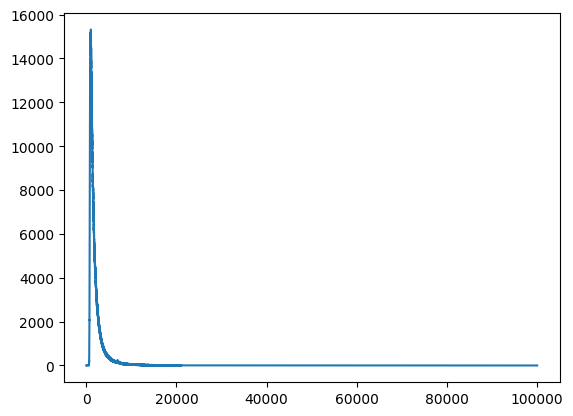

In [50]:
len_dist = []
for i in range(100000):
    len_dist += [length_dict[i]]
start = 0
end = 100000
plt.close()
plt.plot(range(start,end),len_dist[start:end])
plt.show()

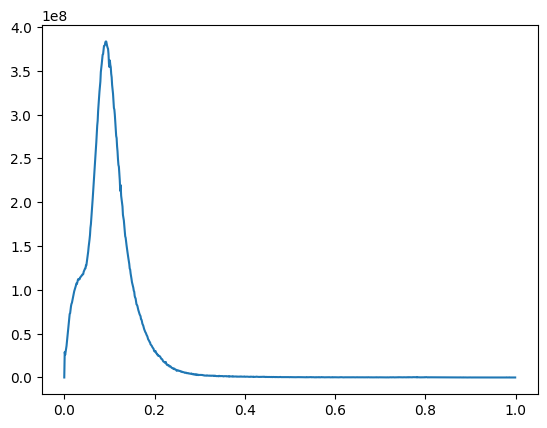

In [51]:
ascii_rate_dist = []
for i in range(0,1000,1):
    ascii_rate_dist += [ascii_rate_dict[str(i/1000+1e-9)[:5]]]
plt.close()
plt.plot(np.array(range(0,1000,1))/1000,ascii_rate_dist)
plt.show()

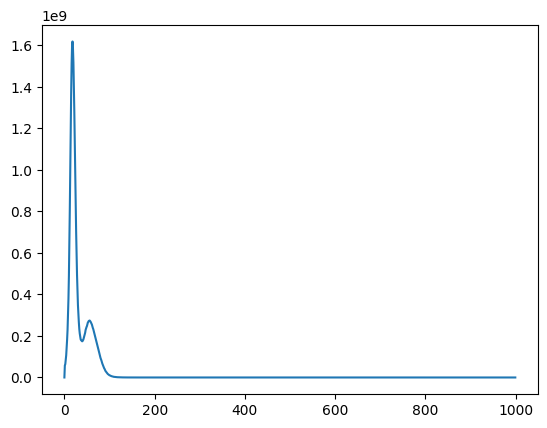

In [52]:
pause_rate_dist = []
for i in range(0,1000,1):
    pause_rate_dist += [pause_rate_dict[str(i/1000+1e-9)[:5]]]
plt.close()
plt.plot(pause_rate_dist)
plt.show()

In [ ]:
#长度与停顿，分别去除前5%与后5%。
#ascii，去除最多的10%。

In [53]:
len_dist = np.array(len_dist)
ascii_rate_dist = np.array(ascii_rate_dist)
pause_rate_dist = np.array(pause_rate_dist)

In [54]:
temp = len_dist.cumsum()
print((temp < len_dist.sum()*0.05).sum())
print((temp < len_dist.sum()*0.95).sum())

823
5074


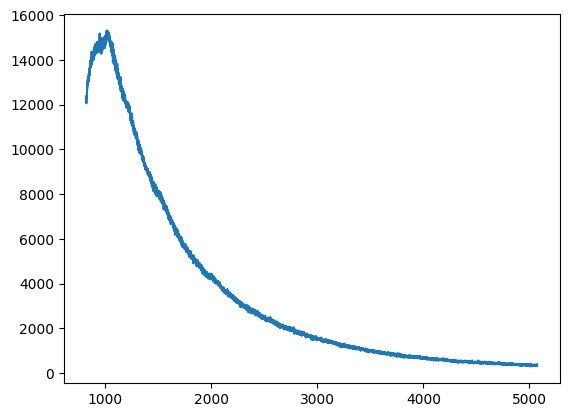

In [55]:
start=823
end=5074
plt.close()
plt.plot(range(start,end),len_dist[start:end])
plt.show()

In [64]:
temp = ascii_rate_dist.cumsum()
print((temp < ascii_rate_dist.sum()*0.00).sum())
print((temp < ascii_rate_dist.sum()*0.95).sum())

0
191


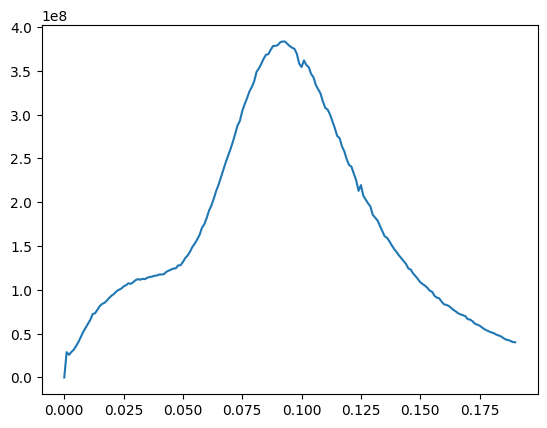

In [66]:
plt.close()
plt.plot(np.array(range(0,191,1))/1000,ascii_rate_dist[0:191])
plt.show()

In [47]:
temp = pause_rate_dist.cumsum()
print((temp < pause_rate_dist.sum()*0.05).sum())
print((temp < pause_rate_dist.sum()*0.95).sum())

10
74


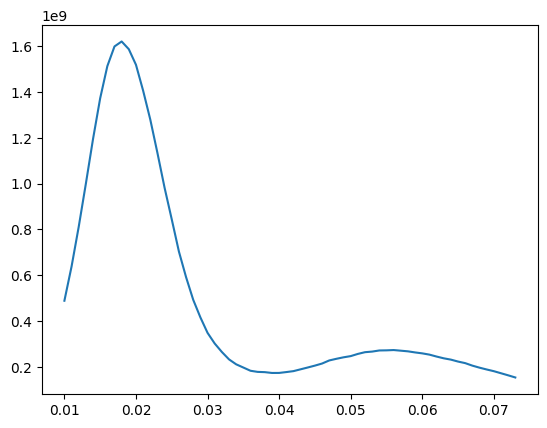

In [57]:
plt.close()
plt.plot(np.array(range(10,74,1))/1000,pause_rate_dist[10:74])
plt.show()

In [67]:
save_f = open("high_data.txt",'w')
drop_f = open("high_drop.txt",'w')
with open('high_ff_final2_random.txt','r') as f_in:
    for line in f_in:
        str_len = len(line)
        ascii_count = sum(1 for c in line if ord(c) < 128)
        pause_count = sum(1 for c in line if c=='，' or c=='。')
        if (str_len > 823 and str_len < 5074 and
            ascii_count/str_len < 0.191 and
            pause_count/str_len > 0.01 and pause_count/str_len < 0.07):
            print(line,end="",file=save_f)
        else:
            print(line,end="",file=drop_f)
save_f.close()
drop_f.close()